# Cambrian-μ TA 1 Sample Code

In [1]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt

## Normal Distribution

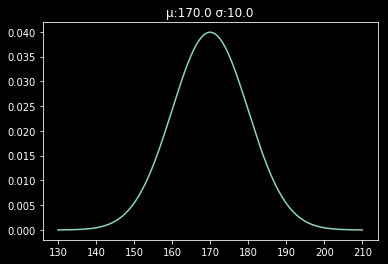

In [2]:
dist = sp.stats.norm(loc=170, scale=10)
x = np.linspace(130,210,1000)
p = dist.pdf(x)

plt.style.use('dark_background')
plt.title('μ:{0} σ:{1}'.format(dist.mean(), dist.std()))
plt.plot(x,p)

### LLN 

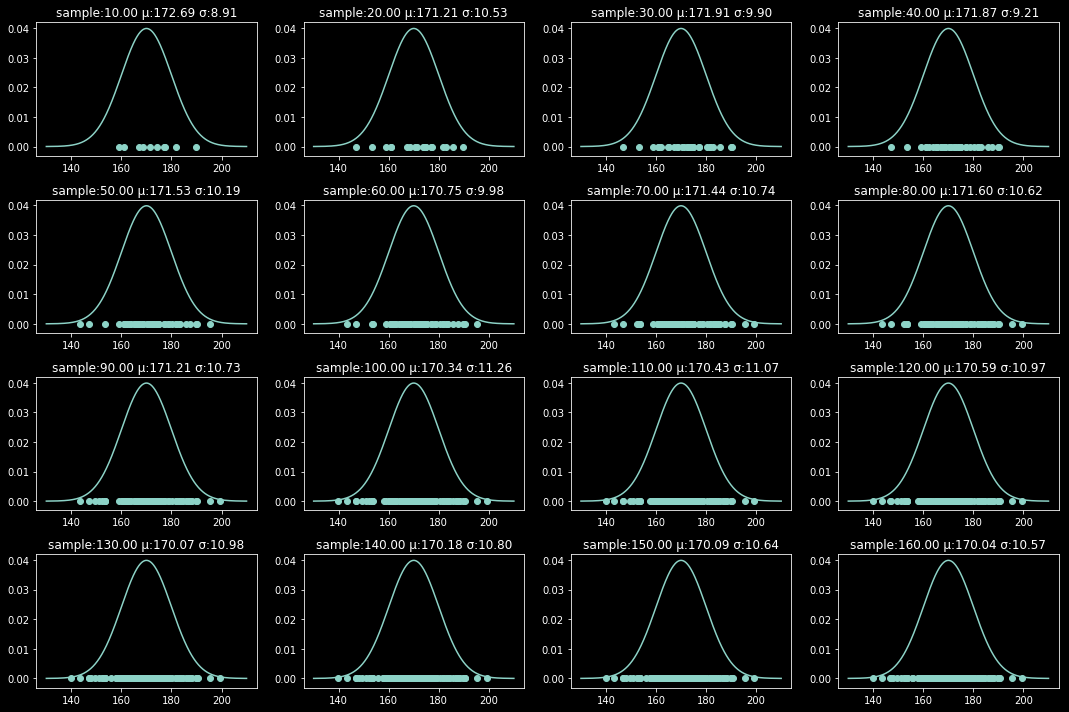

In [3]:
i = 0
plt.figure(figsize=(15,10))
for r in range(4):
    for c in range(4):
        
        i += 1
        num_sample = 10*i
        plt.subplot(4,4,i)

        np.random.seed(31360)
        sample = dist.rvs(num_sample)
        plt.plot(x,p)
        plt.title('sample:{0:.2f} μ:{1:.2f} σ:{2:.2f}'.format(num_sample, sample.mean(), sample.std()))
        plt.scatter(sample, np.zeros(num_sample))

plt.tight_layout()
plt.show()

#### Bernoulli Distribution

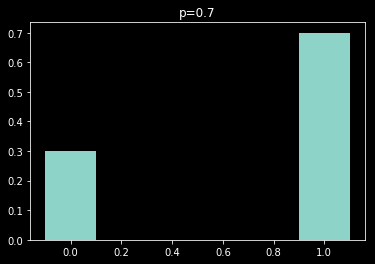

In [4]:
p = 0.7

plt.title('p={0}'.format(p))
plt.bar([0,1],[1-p, p],width=0.2)
plt.show()

### Bernoulli

In [11]:
import seaborn as sns
sns.set_style("dark")
plt.style.use('dark_background')

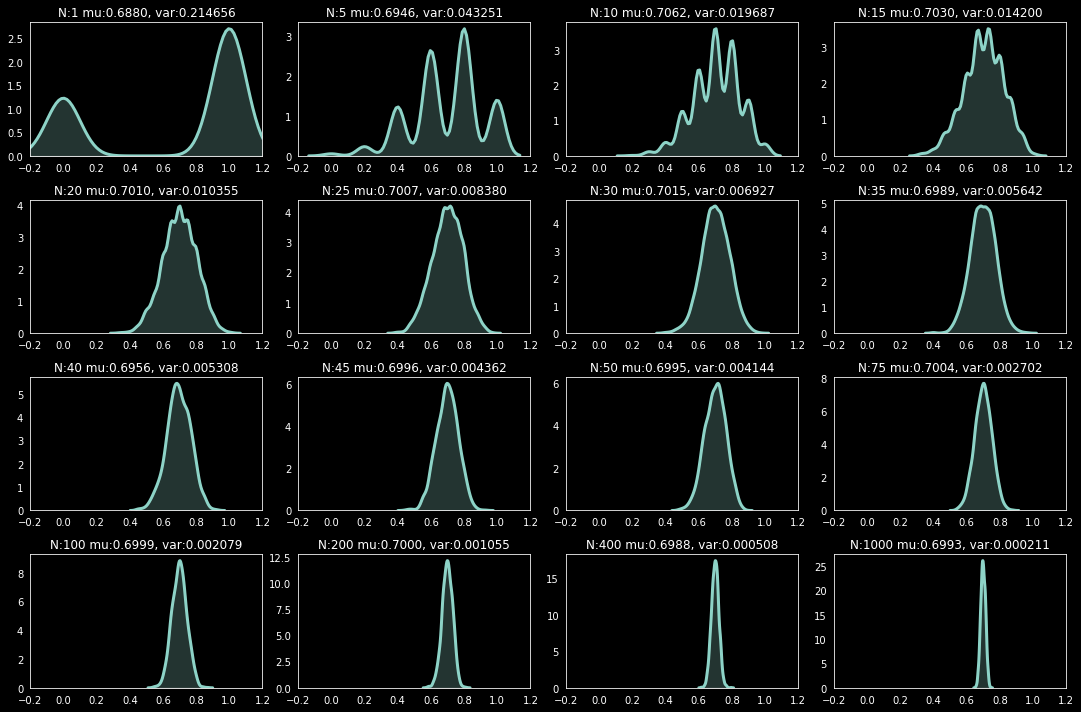

In [31]:
NUM_EXP = 2000

def plt_sample_mean(sample_num=1):
    #bernoulli
    mu = 0.7
    dist_bernoulli = sp.stats.bernoulli(mu)
    var = dist_bernoulli.var()
    std = dist_bernoulli.std()

    x_sample = dist_bernoulli.rvs(sample_num)
    mu_sample = x_sample.mean()
    var_sample = x_sample.var()

    #print("sample bernoulli:", mu_sample, var_sample)

    #sample mean distribution
    dist_sample_mean = []
    for i in range(NUM_EXP):
        sample = dist_bernoulli.rvs(sample_num)
        sample_mean = sample.mean()
        dist_sample_mean.append(sample_mean)

    dist_sample_mean = np.array(dist_sample_mean)

    #print("sample mean- mu:{0}, var:{1}:", dist_sample_mean.mean(), dist_sample_mean.var())

    #plt.hist(x_sample_mean)
    kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
    #plt.hist(sample_means, bins=36, density=True)
    plt.title("N:{0:d} mu:{1:.4f}, var:{2:.6f}".format(sample_num, np.mean(dist_sample_mean),np.var(dist_sample_mean)))
    plt.xlim(-0.2,1.2)
    sns.distplot(dist_sample_mean, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3, 'kernel':'gau'})


sample_numbers = [1,5,10,15,20,25,30,35,40,45,50,75,100,200,400,1000]
    
idx = 0
plt.figure(figsize=(15,10))
for r in range(4):    
    for c in range(4):
        idx += 1        
        plt.subplot(4,4,idx)
        plt_sample_mean(sample_numbers[idx-1])
        
plt.tight_layout()
plt.show()

### CLT

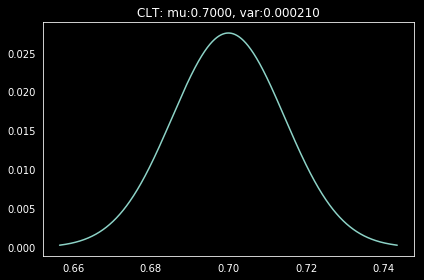

In [9]:
#CLT 
def plot_clt(mu, var, sample_num = 1):
    clt_mu = mu
    clt_var = var/sample_num

    dist_norm = sp.stats.norm(clt_mu, clt_var**.5)
    n_sample = 1000
    samples = np.linspace(clt_mu-3*clt_var**.5,clt_mu+3*clt_var**.5, n_sample)
    prob = dist_norm.pdf(samples)
    plt.plot(samples, prob/n_sample)
    plt.title("CLT: mu:{0:.4f}, var:{1:.6f}".format(dist_norm.mean(), dist_norm.var()))

plot_clt(p, p*(1-p), sample_numbers[-1])       
plt.tight_layout()
plt.show()    

#### Sigmoid

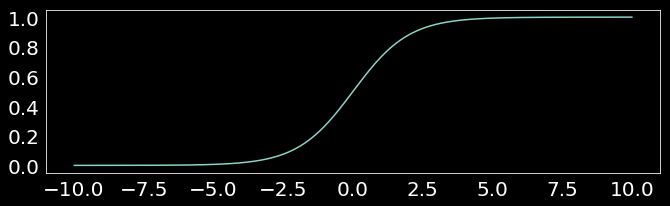

In [12]:
plt.figure(figsize=(11,3))

x = np.linspace(-10, 10, 10000)
y = 1/(1+np.exp(-x))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(x,y)
plt.show()

#### Negative Exponential

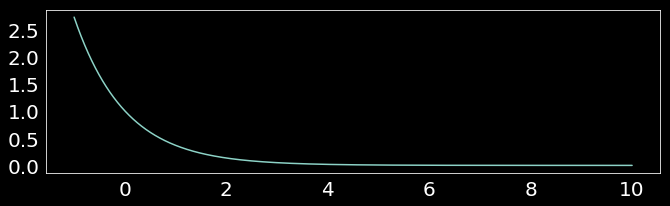

In [13]:
plt.figure(figsize=(11,3))

x = np.linspace(-1, 10, 10000)
y = np.exp(-x)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(x,y)
plt.show()

#### Negative log

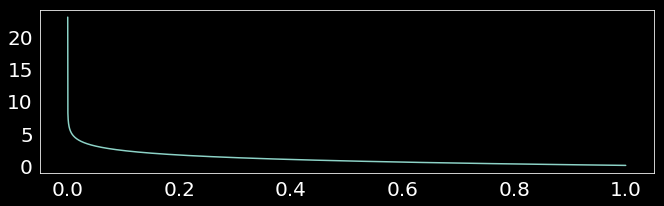

In [14]:
plt.figure(figsize=(11,3))

x = np.linspace(1e-10, 1, 10000)
y = -np.log(x)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(x,y)
plt.show()

#### Softmax

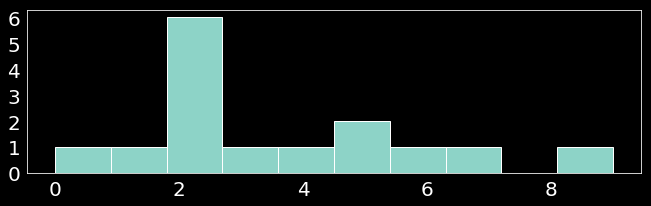

In [15]:
plt.figure(figsize=(11,3))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

score = [1,2,2,2,2,2,2,3,4,5,5,6,7,9,0]
plt.hist(score, bins=10)
plt.show()

### Entropy

In [16]:
s = "X Æ A-Xii "

odict_keys(['X', ' ', 'Æ', 'A', '-', 'i']) [0.2 0.3 0.1 0.1 0.1 0.2]


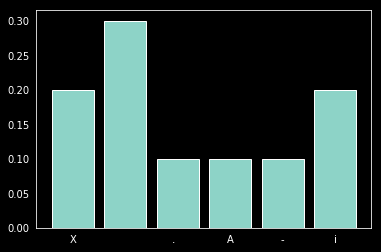

In [17]:
from collections import OrderedDict

dist = OrderedDict()

for c in s:
    if c not in dist:
        dist[c] = 1
    else:
        dist[c] +=1
        
counts = np.array(list(dist.values()))
print(dist.keys(), counts/counts.sum())

plt.bar(dist.keys(), counts/counts.sum())
plt.show()

In [18]:
for c in range(0,len(dist)):
    x = "{0}".format(bin(c)[2:].zfill(3))
    print(c,x)

0 000
1 001
2 010
3 011
4 100
5 101


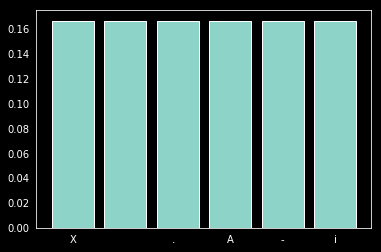

In [19]:
plt.bar(dist.keys(), counts/counts/len(counts))
plt.show()

#### cross entropy

In [20]:
prob_data = np.array(list(dist.values())) / np.sum(list(dist.values()))
prob_model = np.ones(len(prob_data))/len(prob_data)

dist_data = OrderedDict(zip(dist.keys(), prob_data))
dist_model = OrderedDict(zip(dist.keys(), prob_model))

cross_entropy = []
entropy_data = []
relative_entropy = []

for event, p_data in dist_data.items():
    #cross entropy
    p_model = dist_model[event]
    nats_cs = -np.log(p_model) * p_data
    print("e:{0} pm:{1:.2f} -ln(pm):{2:.2f} pd:{3:.2f} nats:{4:.2f})".format(event, p_model, -np.log(p_model), p_data, nats_cs))
    cross_entropy.append(nats_cs)
    #entropy
    nats = -np.log(p_data) * p_data
    entropy_data.append(nats)
    #KL divergence
    relative_entropy.append(np.log(p_data/p_model) * p_data)
    
cross_entropy = np.array(cross_entropy)
entropy_data = np.array(entropy_data)
relative_entropy = np.array(relative_entropy)

print("cross entropy:", np.mean(cross_entropy))
print("entropy:", np.mean(entropy_data))
print("relative entropy:", np.mean(cross_entropy) - np.mean(entropy_data))
print("KL:", np.mean(relative_entropy))

e:X pm:0.17 -ln(pm):1.79 pd:0.20 nats:0.36)
e:  pm:0.17 -ln(pm):1.79 pd:0.30 nats:0.54)
e:Æ pm:0.17 -ln(pm):1.79 pd:0.10 nats:0.18)
e:A pm:0.17 -ln(pm):1.79 pd:0.10 nats:0.18)
e:- pm:0.17 -ln(pm):1.79 pd:0.10 nats:0.18)
e:i pm:0.17 -ln(pm):1.79 pd:0.20 nats:0.36)
cross entropy: 0.29862657820467586
entropy: 0.2826237556949391
relative entropy: 0.01600282250973678
KL: 0.01600282250973675


### Classification Example

In [21]:
################################################################################################################
#environment reparation
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [22]:
################################################################################################################
#config preparation
batch_size = 128
num_classes = 10
epochs = 20

In [23]:
def prepare_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(60000, 784)
    x_test = x_test.reshape(10000, 784)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    return (x_train, y_train), (x_test, y_test)

In [24]:
################################################################################################################
#1. Data
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = prepare_data()
################################################################################################################
#2. Model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
################################################################################################################
#3. Objective, Measurement, Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
################################################################################################################
#4. Train
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
################################################################################################################
#5. Analysis for generalization
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.2164 - acc: 0.9359 - val_loss: 0.0966 - val_acc: 0.9660
Epoch 2/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0785 - acc: 0.9759 - val_loss: 0.0830 - val_acc: 0.9735
Epoch 3/20
60000/60000 [=============

In [25]:
def onehot_to_v(data):
    return np.argmax(data)

def binarize_labels(labels):
    labels_bin = np.zeros(len(labels))

    for i, y in enumerate(labels):
        v = onehot_to_v(y)
        if v%2 == 0:
            labels_bin[i] = 0
        else:
            labels_bin[i] = 1
            
    return labels_bin
        
y_train_bin = binarize_labels(y_train) 
y_test_bin = binarize_labels(y_test) 

In [26]:
################################################################################################################
#1. Data
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = prepare_data()

y_train_bin = binarize_labels(y_train) 
y_test_bin = binarize_labels(y_test) 
################################################################################################################
#2. Model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()
################################################################################################################
#3. Objective, Measurement, Optimizer
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
################################################################################################################
#4. Train
history = model.fit(x_train, y_train_bin,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test_bin))
################################################################################################################
#5. Analysis for generalization
score = model.evaluate(x_test, y_test_bin, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 665,089
Trainable params: 665,089
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.1006 - acc: 0.9624 - val_loss: 0.0535 - val_acc: 0.9813
Epoch 2/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0427 - acc: 0.9854 - val_loss: 0.0517 - val_acc: 0.9818
Epoch 3/20
60000/60000 [=============

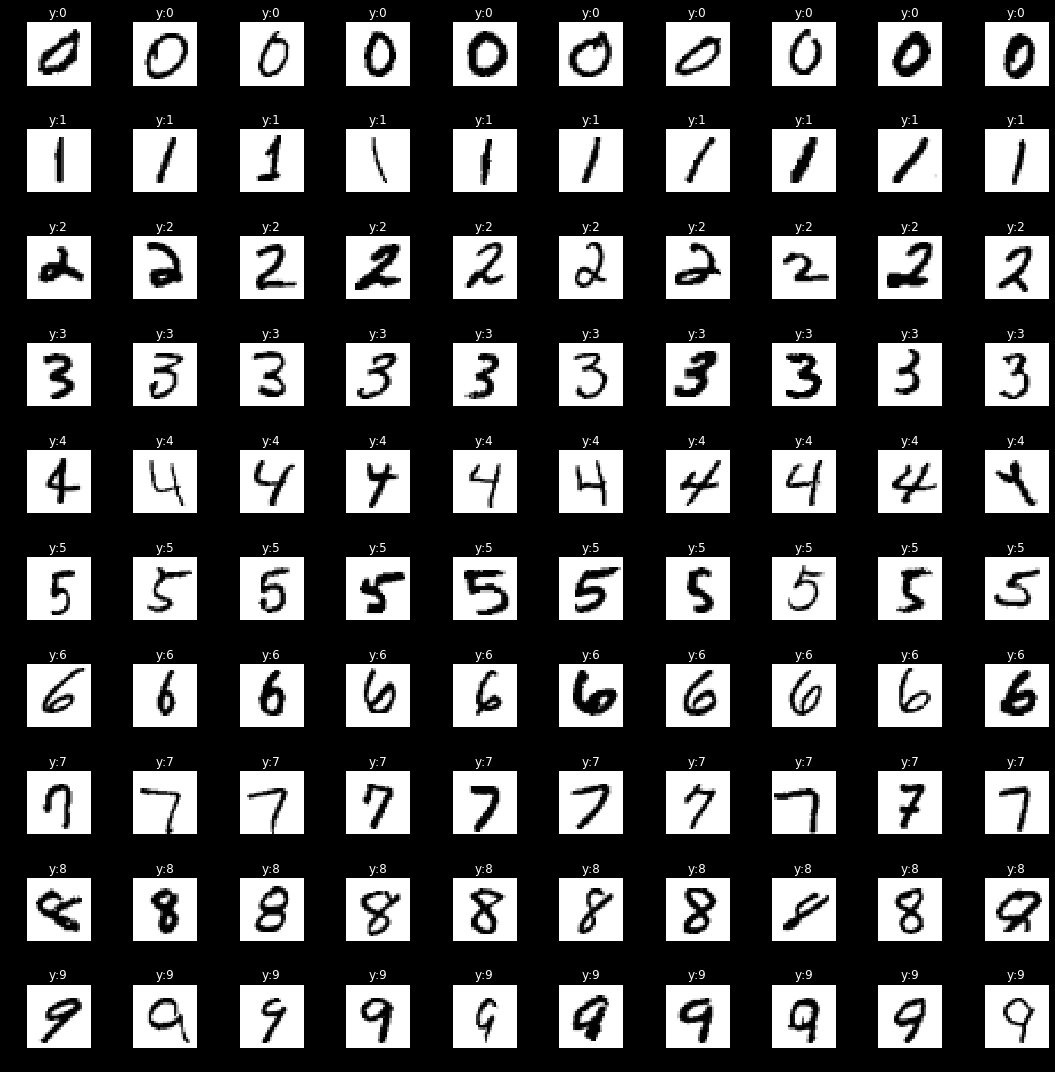

In [27]:
plt.figure(figsize=(15,15))

idx = 0
for row in range(10):
    for col in range(10):       
        while 1:
            idx_y = np.random.randint(0, len(y_train), 1)[0]
            if onehot_to_v(y_train[idx_y]) == row:
                break
        
        idx += 1
        plt.subplot(10, 10, idx)
        plt.axis('off')
        plt.tight_layout()
        plt.title("y:{0}".format(onehot_to_v(y_train[idx_y])))
        plt.imshow(x_train[idx_y].reshape((28,28)),cmap = 'binary')

plt.show()

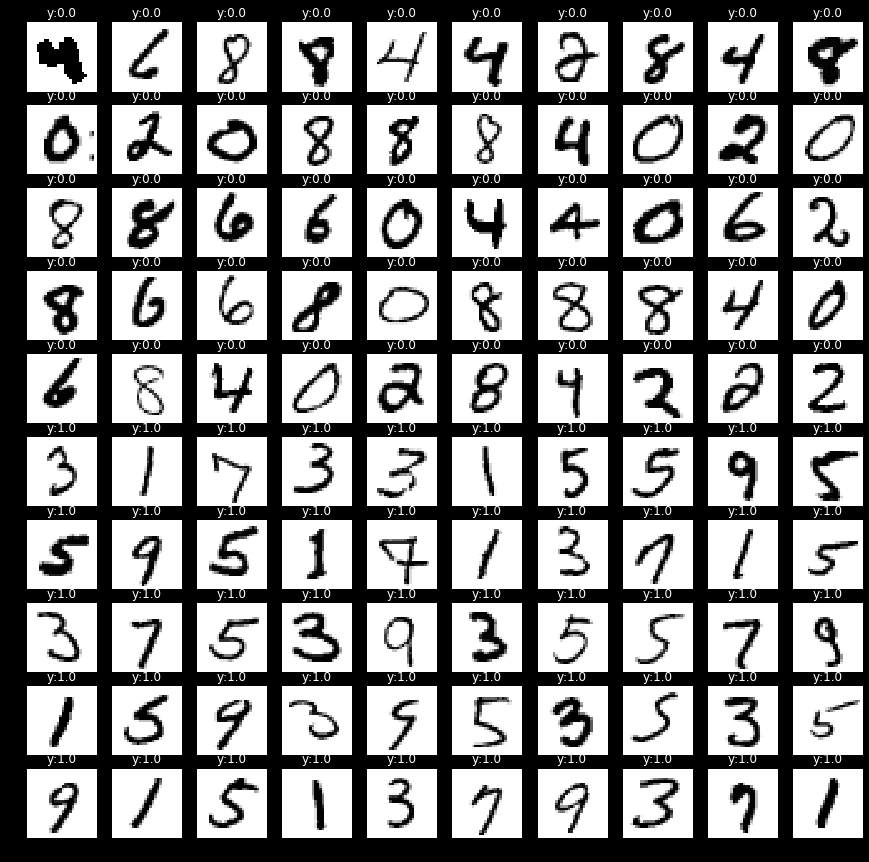

In [28]:
plt.figure(figsize=(15,15))
idx = 0
plt.tight_layout()

for row in range(10):
    for col in range(10):       
        while 1:
            idx_y = np.random.randint(0, len(y_train_bin), 1)[0]
            if row < 5 and onehot_to_v(y_train[idx_y])%2 == 0:
                break

            if row >= 5 and onehot_to_v(y_train[idx_y])%2 == 1:
                break
                
        idx += 1
        plt.subplot(10, 10, idx)              
        plt.axis('off')        
        plt.title("y:{0}".format(y_train_bin[idx_y]))
        plt.imshow(x_train[idx_y].reshape((28,28)),cmap = 'binary')


plt.show()

In [122]:
y_pred = model.predict(x_test).reshape([-1])
y_data = y_test_bin
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

In [136]:
correct = np.sum(y_pred == y_data)
error = np.sum(y_pred != y_data)
print(correct, error, correct/(correct+error))

9911 89 0.9911


[]

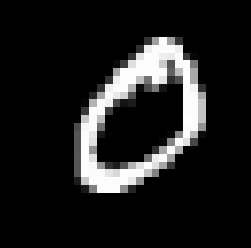

In [169]:
plt.imshow(x_train[1].reshape(28,28), cmap='gray')
plt.axis('off')
plt.plot()

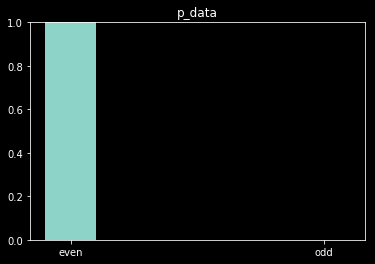

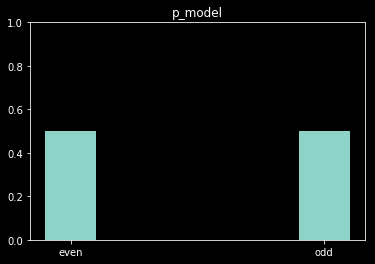

In [174]:
p_data = [1.0, 0.0]
p_model = [0.5, 0.5]

plt.title('p_data')
plt.ylim(0,1)
plt.bar(['even','odd'],p_data,width=0.2)
plt.show()

plt.title('p_model')
plt.ylim(0,1)
plt.bar(['even','odd'],p_model,width=0.2)
plt.show()


In [176]:
prob_data = [1-1e-10, 1e-10]
prob_model = [0.5, 0.5]

dist_data = OrderedDict(zip(['even', 'odd'], prob_data))
dist_model = OrderedDict(zip(['even', 'odd'], prob_model))

cross_entropy = []
entropy_data = []
relative_entropy = []

for event, p_data in dist_data.items():
    #cross entropy
    p_model = dist_model[event]
    nats_cs = -np.log(p_model) * p_data
    print("e:{0} pm:{1:.2f} -ln(pm):{2:.2f} pd:{3:.2f} nats:{4:.2f})".format(event, p_model, -np.log(p_model), p_data, nats_cs))
    cross_entropy.append(nats_cs)
    #entropy
    nats = -np.log(p_data) * p_data
    entropy_data.append(nats)
    #KL divergence
    relative_entropy.append(np.log(p_data/p_model) * p_data)
    
cross_entropy = np.array(cross_entropy)
entropy_data = np.array(entropy_data)
relative_entropy = np.array(relative_entropy)

print("cross entropy:", np.mean(cross_entropy))
print("entropy:", np.mean(entropy_data))
print("relative entropy:", np.mean(cross_entropy) - np.mean(entropy_data))
print("KL:", np.mean(relative_entropy))

e:even pm:0.50 -ln(pm):0.69 pd:1.00 nats:0.69)
e:odd pm:0.50 -ln(pm):0.69 pd:0.00 nats:0.00)
cross entropy: 0.3465735902799726
entropy: 1.2012925506315415e-09
relative entropy: 0.34657358907868
KL: 0.3465735890786801


In [195]:
y_pred = model.predict(x_test).reshape([-1])
y_data = y_test_bin

cross_entropy = np.zeros(len(y_data))

for i, y in enumerate(y_data):
    p = y_pred[i]
    cross_entropy[i] = -(y*np.log(p+1e-10) + (1-y)*np.log(1-p+1e-10))
 
print("entropy loss:", np.mean(cross_entropy))

entropy loss: 0.04573642198539171


In [217]:
idx_correct = y_pred == y_data
idx_incorrect = y_pred != y_data

tp_idx = []
tn_idx = []
fp_idx = []
fn_idx = []

y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

for i, y_d in enumerate(y_data):
    y_p = y_pred[i]
    if y_d == 1:
        #positive
        if y_p == y_d:
            #tp
            tp_idx.append(i)
        else:
            #fn
            fn_idx.append(i)   
    else:
        #negative
        if y_p == y_d:
            #tn
            tn_idx.append(i)
        else:
            #fp
            fp_idx.append(i)


In [227]:
tp = len(tp_idx)
tn = len(tn_idx)
fp = len(fp_idx)
fn = len(fn_idx)

print("tp:{0} tn:{1} fp:{2} fn:{3}".format(tp,tn,fp,fn))
print("tp:{0} tn:{1} fp:{2} fn:{3}".format(tp/len(y_data),tn/len(y_data),fp/len(y_data),fn/len(y_data)))

print("accuracy:{0} precision:{1} recall:{2}".format((tp+tn)/len(y_data), tp/(tp+fp), tp/(tp+fn)))

tp:5012 tn:4899 fp:27 fn:62
tp:0.5012 tn:0.4899 fp:0.0027 fn:0.0062
accuracy:0.9911 precision:0.9946417940067473 recall:0.9877808435159637


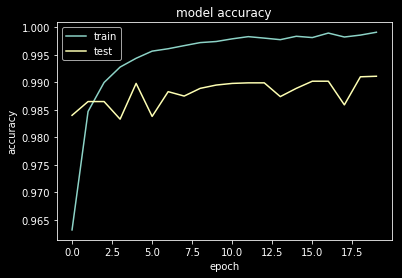

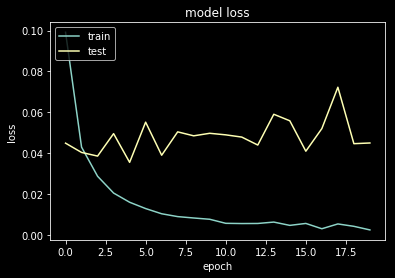

In [224]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()